In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# DECISION TREES

## Criterion


to split the vertice, one should maximize the following error functional:

$$
Q(R_m) = H(R_m) - ( \frac{R_l}{R_m} H(R_l) + \frac{R_r}{R_m} H(R_r))
$$

$H(R)$ - any information content, for example entropy:

$$
H(R) = - \sum_{k=1}^K p_k \log{p_k}
$$

or Gini impurity

$$
H(R) = - \sum_{k=1}^K p_k (1-{p_k})
$$

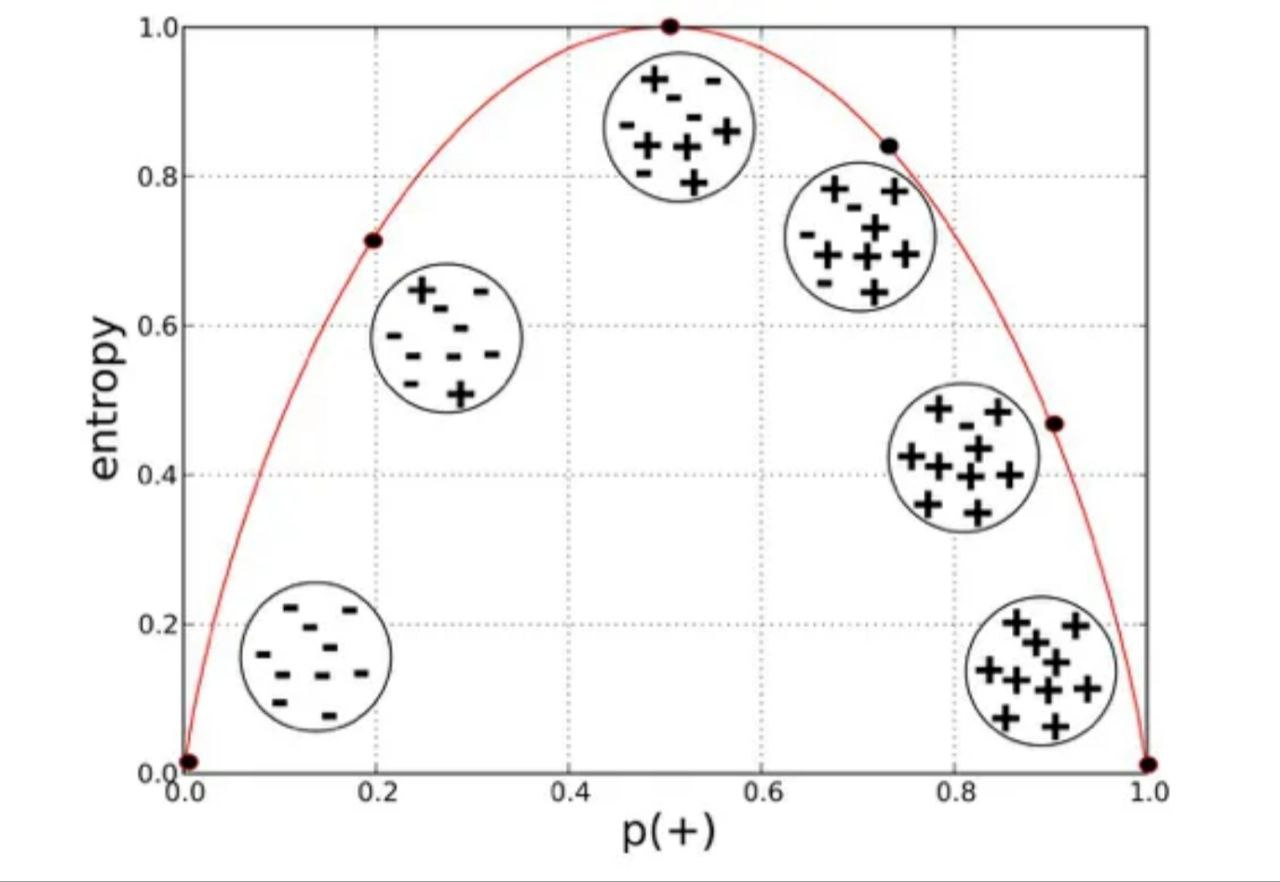

In [ ]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)





text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

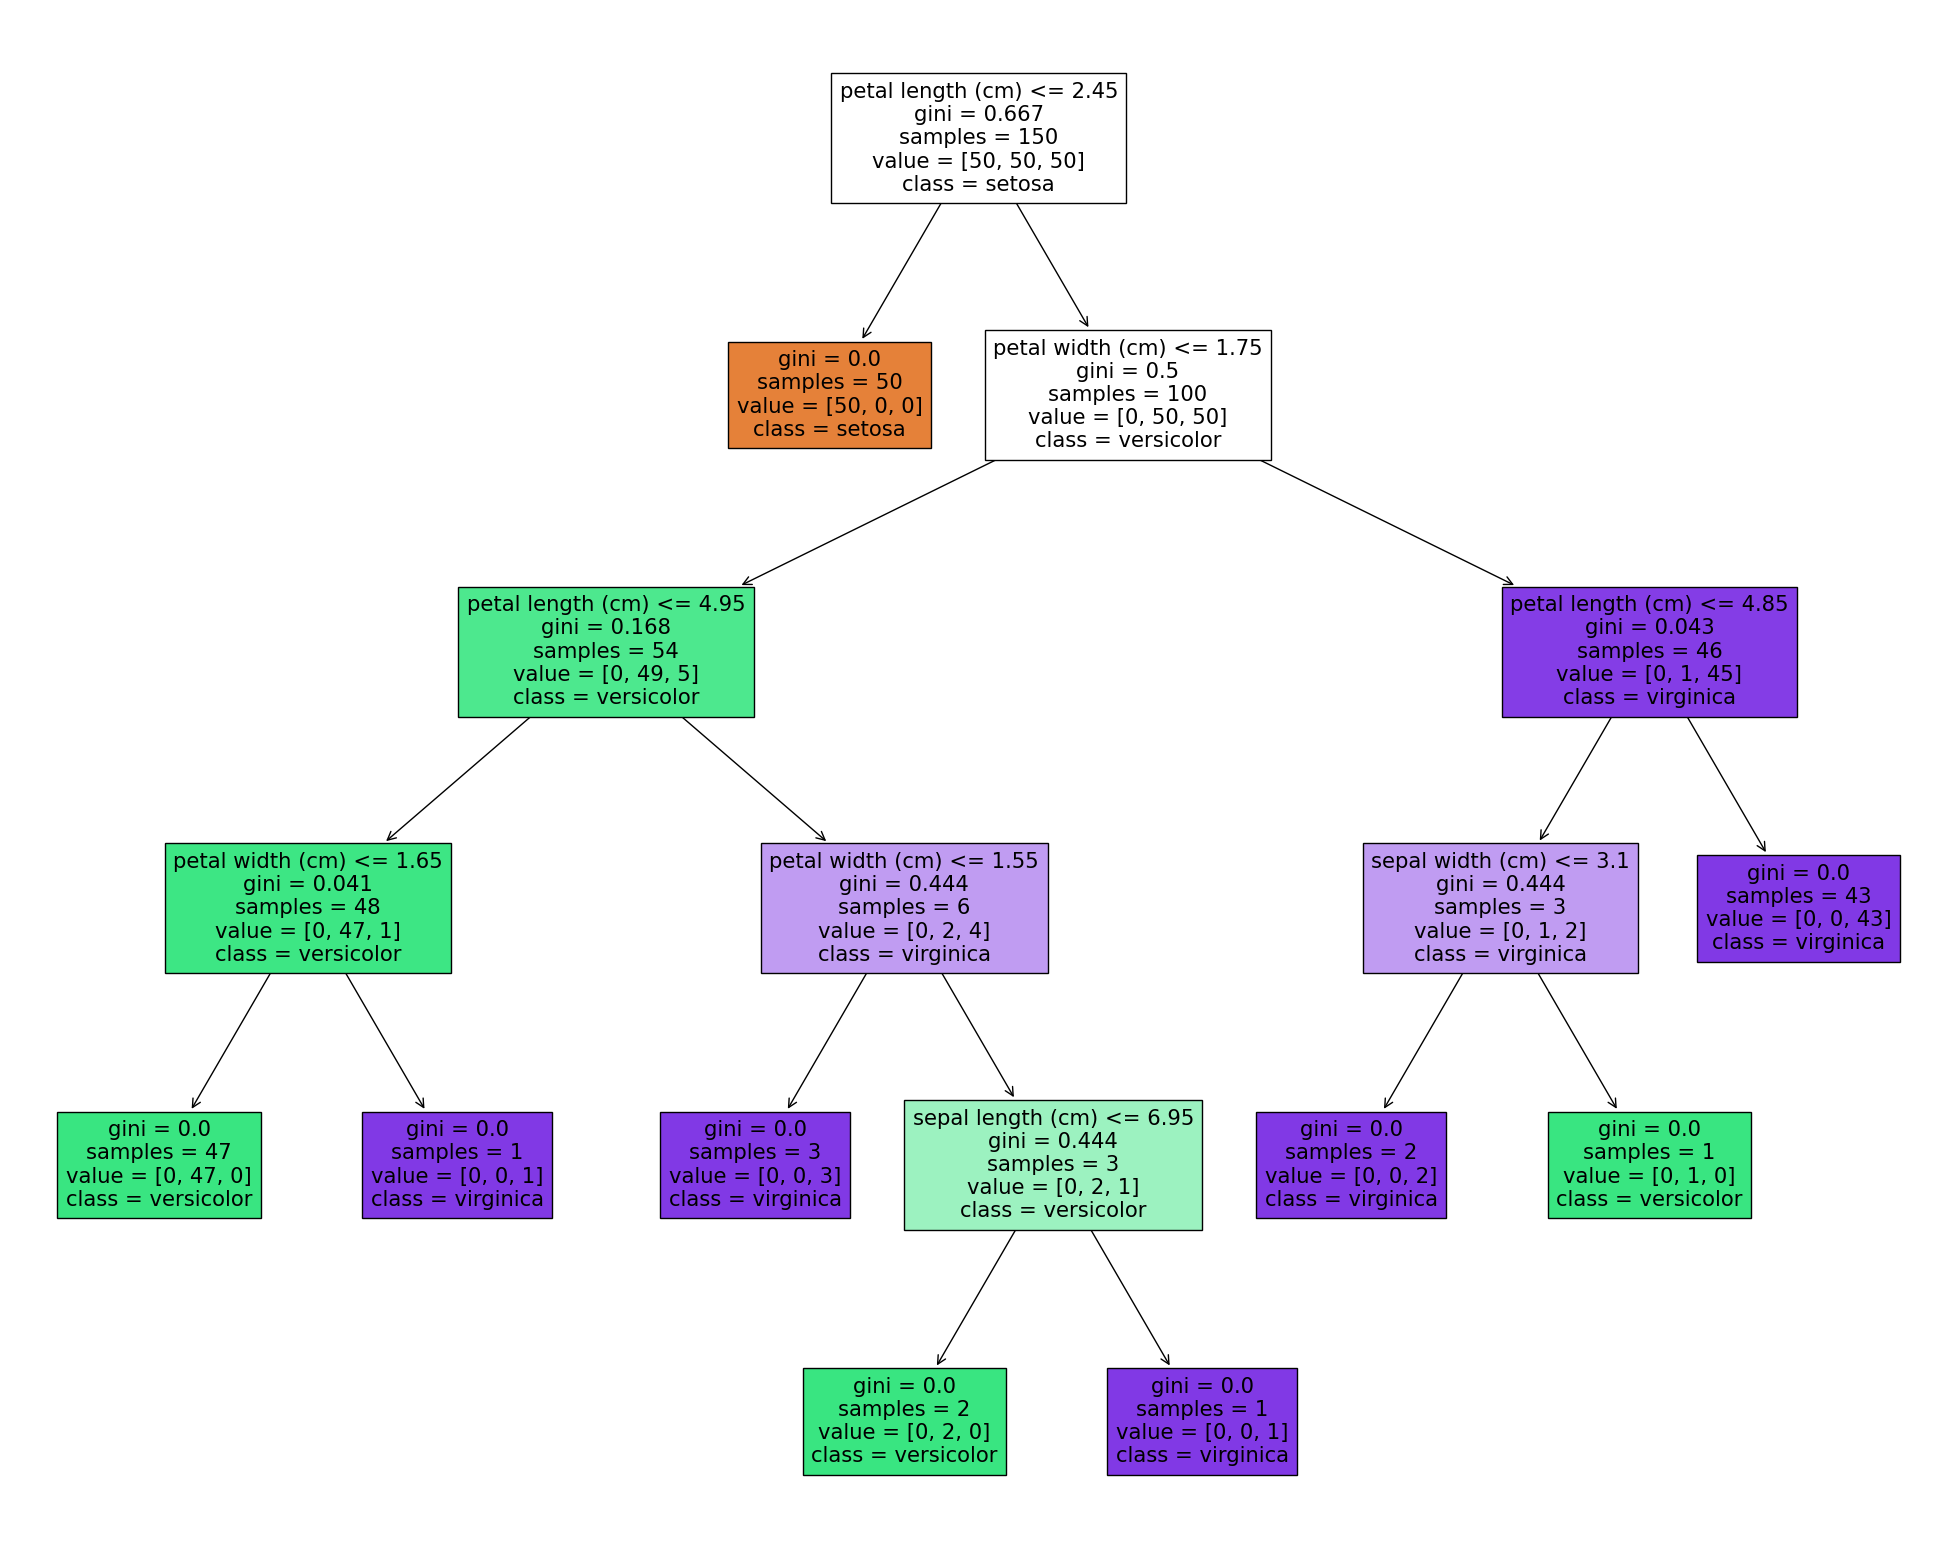

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=iris.feature_names,
                   class_names=iris.target_names,
                   filled=True)

# OVERFITTED TREE EXAMPLE


In [ ]:
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv('drive/MyDrive/spam.csv', encoding='latin-1')
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [ ]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df[df.v1=='ham']

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...
...,...,...
5565,ham,Huh y lei...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df = df.replace(['ham','spam'],[0, 1])

In [ ]:
df

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string

In [ ]:

df["v2_lower"] = df["v2"].str.lower()
df.drop('v2', axis=1, inplace=True)
df.head()

,v1,v2_lower
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


# HOW TO REPRESENT A TEXT? TF-IDF

TF stands for **term frequency**

$$
tf(t,d) = \frac{n_t}{\sum_k n_k}
$$

IDF stands for **inverse document frequency**

$$
idf(t, D)= log\frac{|D|}{|\{d_i \in  D | t \in d_i\}|}
$$

TF-IDF:

$$
tf-idf(t, d, D) = tf(t,d) \times idf(t, D)
$$

In [ ]:
df["v2_lower"].values

array(['go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...',
       'ok lar... joking wif u oni...',
       "free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's",
       ..., 'pity, * was in mood for that. so...any other suggestions?',
       "the guy did some bitching but i acted like i'd be interested in buying something else next week and he gave it to us for free",
       'rofl. its true to its name'], dtype=object)

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(df["v2_lower"].values, df["v1"].values)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_ = vectorizer.fit(X_train).transform(X_train)
X_test_ = vectorizer.transform(X_test)
# vectorizer.get_feature_names_out()

In [ ]:
len(vectorizer.get_feature_names_out())

500

In [ ]:
len(vectorizer.get_feature_names_out())

8672

In [ ]:
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X_train_,y_train)

# text_representation = tree.export_text(clf)
# print(text_representation)

In [ ]:
y_preds[0,:].shape

(2,)

In [ ]:
y_test.shape

(1393,)

In [ ]:
y_preds = model.predict_proba(X_test_)

In [ ]:
y_preds[:, 1]

array([0., 1., 0., ..., 0., 0., 0.])

In [ ]:
np.random.choice([1,2,3], 2)

array([2, 2])

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_preds[:, 1])

0.9104317789291881

In [ ]:
fig = plt.figure(figsize=(105,100))
_ = tree.plot_tree(clf,
                   feature_names=vectorizer.get_feature_names_out(),
                   class_names=['spam', 'ham'],
                   filled=True)

# CLASSIFIERS SUMMARY


In [ ]:
from sklearn.datasets import make_moons, make_circles

def make_sunny_moons(n_sun=50, n_moons=100, noise=0.0, sun_radius=1.9, theta=None):
    X_moons, y_moons = make_moons(n_samples=n_moons, noise=noise)
    if not n_sun:
        return X_moons, y_moons

    np.random.seed(0xBEEFBAD)
    angles = np.arange(0, 2 * np.pi, 2 * np.pi / n_sun)
    X_sun = sun_radius * np.column_stack([np.cos(angles), np.sin(angles)]) + np.array([0.5, 0.25])
    X_sun += np.random.normal(scale=noise, size=X_sun.shape)
    y_sun = 2 * np.ones(n_sun)

    X = np.vstack([X_moons, X_sun])
    y = np.concatenate([y_moons, y_sun]).astype(int)
    X -= X.mean(axis=0)

    if theta is None:
        theta = np.pi / 4
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c,-s), (s, c)))
    X = X @ R

    return X, y

X, y = make_sunny_moons(n_sun=150, n_moons=300, noise=0.15)

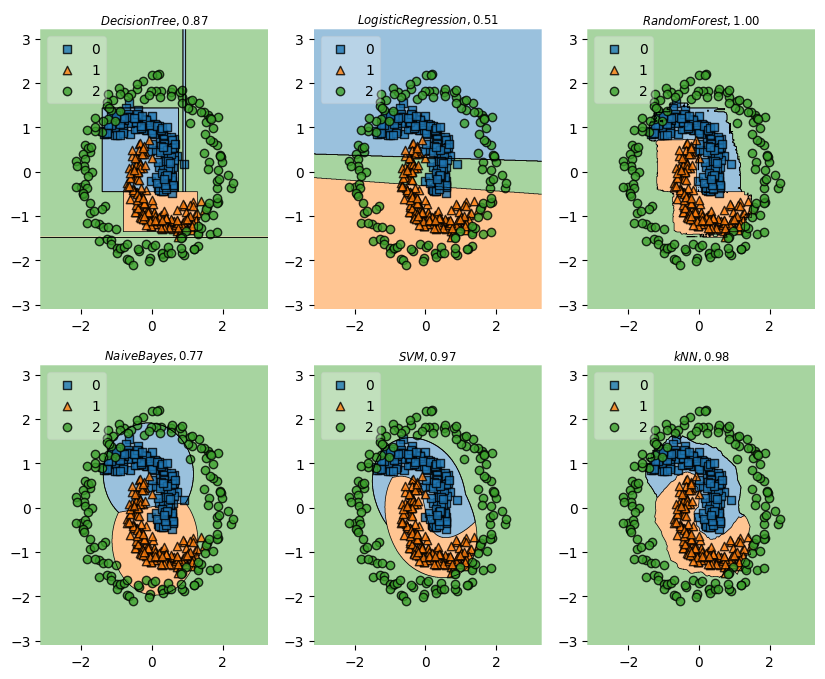

In [ ]:
import mlxtend
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import datasets
import numpy as np
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf0 = ...

clf1 = ...
clf2 = ...
clf3 = ...
clf4 = ...
clf5 = ...

gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(10,8))

labels = ['Decision Tree  ','Logistic Regression  ', 'Random Forest  ', 'Naive Bayes  ', 'SVM ', 'kNN ']
for clf, lab, grd in zip([clf0, clf1, clf2, clf3, clf4, clf5],
                         labels,
                         itertools.product([0, 1,2], repeat=2)):

    clf...
    ax = plt.subplot(gs[grd[0], grd[1]])
    a = ...
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title('$_{'+str(lab)+ ', ' + str('{:.2f}'.format(a))+'}$')

plt.show()

#. TASK 2

## data preprocessing

In [ ]:
df = pd.read_csv('drive/MyDrive/spam.csv', encoding='latin-1')
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [ ]:
df = df.replace(['ham','spam'],[0, 1])
df["v2_lower"] = df["v2"].str.lower()
df.drop('v2', axis=1, inplace=True)
df.head()

,v1,v2_lower
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


In [ ]:
len(df[df.v1==0]), len(df[df.v1==1])

(4825, 747)

## DATASET BALANCING

In [ ]:
df_neg = df[df.v1==0].sample(n=747, random_state=1)
df_pos = df[df.v1==1]
df_balanced = pd.concat([df_neg, df_pos])
df_balanced.v1.sum() / len(df_balanced)

0.5

## DOC2VEC

In [ ]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df_balanced["v2_lower"].values)]
model = Doc2Vec(documents, vector_size=40, window=2, min_count=1, workers=4)

In [ ]:
X_d2v = np.concatenate([model.dv[i].reshape(1, -1) for i in range( 1494)])
X_train, X_test, y_train, y_test = ...

# CLASSIFIERS

In [ ]:
import seaborn as sns

In [ ]:
clf0 = tree.DecisionTreeClassifier(random_state=1, max_depth=5)

clf1 = LogisticRegression(random_state=1,
                          solver='newton-cg',)
clf2 = RandomForestClassifier(random_state=1, n_estimators=100)
clf3 = GaussianNB()
clf4 = SVC(gamma='auto', probability = True)
clf5 = KNeighborsClassifier(n_neighbors=3)

In order to compute roc curve one must compute:
$$
TPR = \frac{TP}{P}
$$

$$
FPR = \frac{FP}{N}
$$

where $P$ is number of objects of class $1$, $N$ is number of objects of class $0$, $TP$ the amount of the objects of class $1$ that were classified as class $1$ and $TFP$ the amount of the objects of class $0$ that were classified as class $1$

$TPR$ and $FPR$ depend on the threshold  so, in order to construct the roc-curve one must compute $TPR$ and $FPR$ for different thresholds.

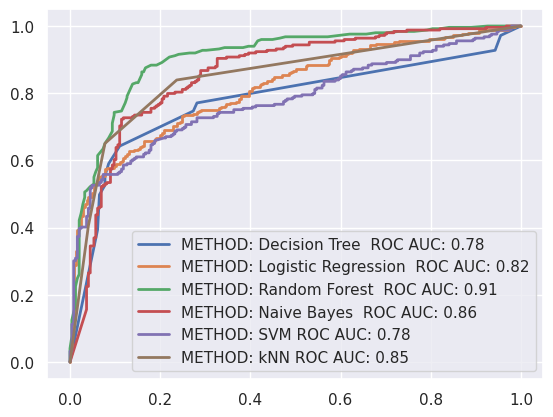

In [ ]:
sns.set()
for clf, label in zip([clf0, clf1, clf2, clf3, clf4, clf5], labels):
  clf....

  y_pred =....
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred[:, 1])
  roc_auc = metrics.auc(fpr, tpr)
  plt.plot(fpr, tpr, lw = 2, label ='METHOD: {}'.format(label) + 'ROC AUC: {:.2f}'.format(roc_auc))
plt.legend()
plt.show()
